In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(readr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [54]:
values <- read_csv("scenario_2.csv") %>%
    filter(q < 2500) %>%
    mutate(ddf = c(0, diff(df))) %>%
    mutate(ns = q - f/df) %>%
    mutate(cr = abs(ddf/df)) %>%
    mutate(dr = abs(ns - 1188.84))

head(values)

Parsed with column specification:
cols(
  q = col_integer(),
  h = col_double(),
  dh = col_double(),
  l = col_double(),
  dl = col_double(),
  f = col_double(),
  df = col_double(),
  my = col_double(),
  s = col_double(),
  m = col_double()
)


q,h,dh,l,dl,f,df,my,s,m,ddf,ns,cr,dr
0,0.0e+00,0.0e+00,1100.037,-1.099528,-1100.037,1.099528,1100.037,1100.037,1100.037,0e+00,1000.463,0.000000e+00,188.3771
1,3.0e-06,5.0e-06,1098.937,-1.099522,-1098.937,1.099528,1098.937,1098.937,1098.937,0e+00,1000.463,0.000000e+00,188.3771
2,1.0e-05,1.0e-05,1097.838,-1.099517,-1097.838,1.099527,1097.838,1097.838,1097.838,-1e-06,1000.464,9.094820e-07,188.3762
3,2.3e-05,1.6e-05,1096.738,-1.099511,-1096.738,1.099527,1096.738,1096.738,1096.738,0e+00,1000.464,0.000000e+00,188.3762
4,4.2e-05,2.1e-05,1095.639,-1.099505,-1095.639,1.099526,1095.639,1095.639,1095.639,-1e-06,1000.465,9.094828e-07,188.3753
5,6.6e-05,2.7e-05,1094.539,-1.099499,-1094.539,1.099525,1094.539,1094.539,1094.539,-1e-06,1000.466,9.094836e-07,188.3744


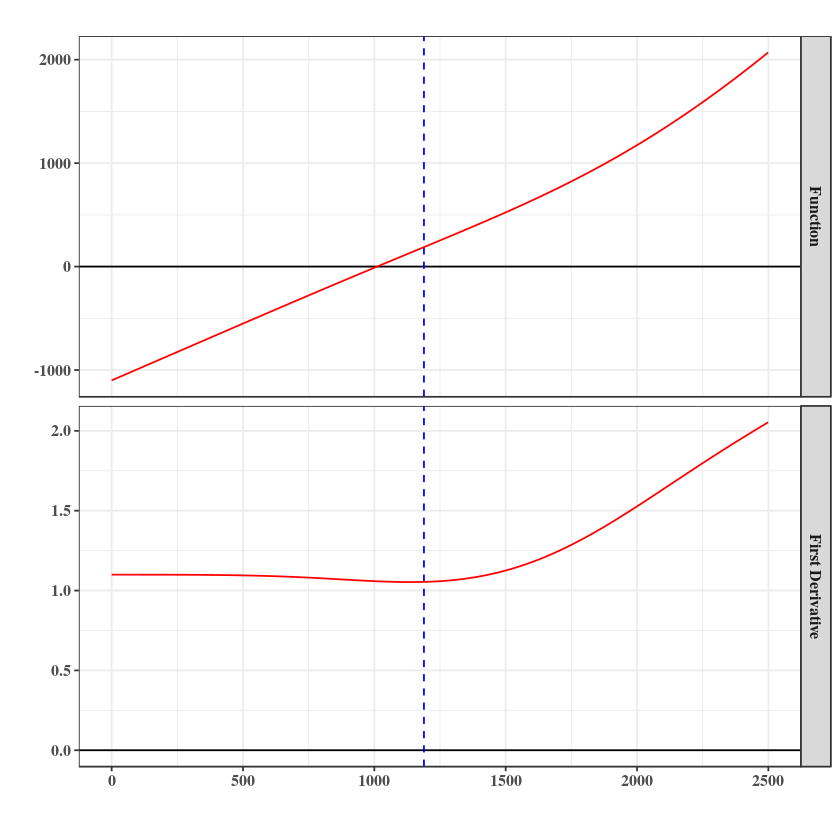

In [62]:
plot_data <- values %>%
    select(q, Function=f, `First Derivative`=df) %>%
    gather(key, value, -q) %>%
    mutate(key=factor(key, levels=c("Function", "First Derivative")))

ggplot(plot_data, aes(x=q, y=value)) + 
    geom_hline(yintercept=0) +
    geom_vline(xintercept=1188.844074, color="blue", linetype="dashed") +
    geom_line(color="red") +
    theme_bw() +
    labs(title = "",
         caption = "", 
         x = "", 
         y = ""
        ) +
    theme(text=element_text(family="Times", face="bold", size=12)) +
    facet_grid(key~., scales="free_y") 

ggsave("root_function_report.pdf", height=4, width=6, units="in")

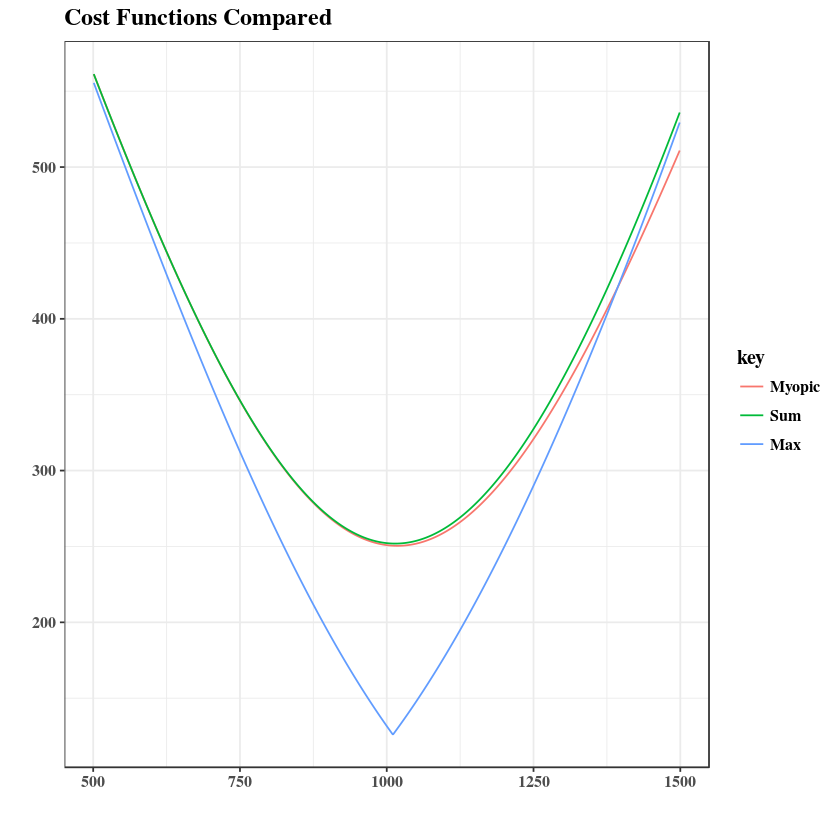

In [61]:
plot_data <- values %>%
    filter(q > 500 & q < 1500) %>%
    select(q, Sum=s, Myopic=my, Max=m) %>%
    gather(key, value, -q) %>%
    mutate(key=factor(key, levels=c("Myopic", "Sum", "Max")))

ggplot(plot_data, aes(x=q, y=value, group=key, color=key)) + 
    geom_line() +
    theme_bw() +
    labs(title = "Cost Functions Compared",
         caption = "", 
         x = "", 
         y = ""
        ) +
    theme(text=element_text(family="Times", face="bold", size=12)) +

ggsave("cost_function_report.pdf", height=4, width=6, units="in")

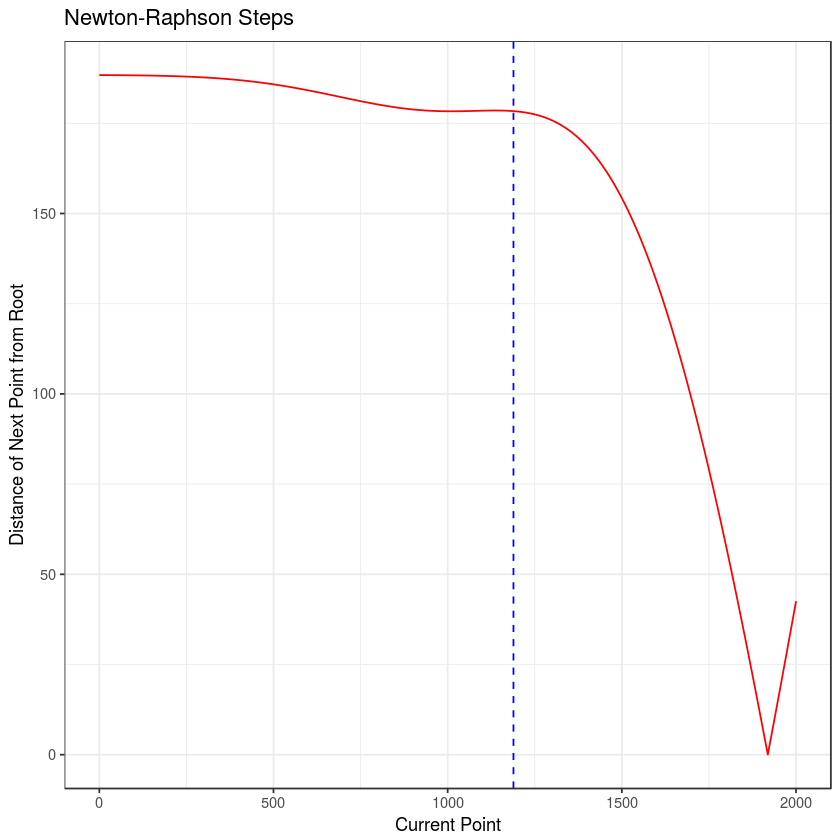

In [63]:
plot_data <- values %>%
    filter(q >= 0 & q <= 2000) %>%
    select(`Current Point`=q, `Next Point`=ns, `Distance of Next Point from Root`=dr)

ggplot(plot_data, aes(x=`Current Point`, y=`Distance of Next Point from Root`)) + 
    geom_vline(xintercept=1188.844074, color="blue", linetype="dashed") +
    geom_line(color="red") +
    theme_bw() +
    xlim(0, 2000) + 
    ggtitle("Newton-Raphson Steps")

Parsed with column specification:
cols(
  q = col_integer(),
  time = col_double()
)
`geom_smooth()` using method = 'gam'


`geom_smooth()` using method = 'gam'


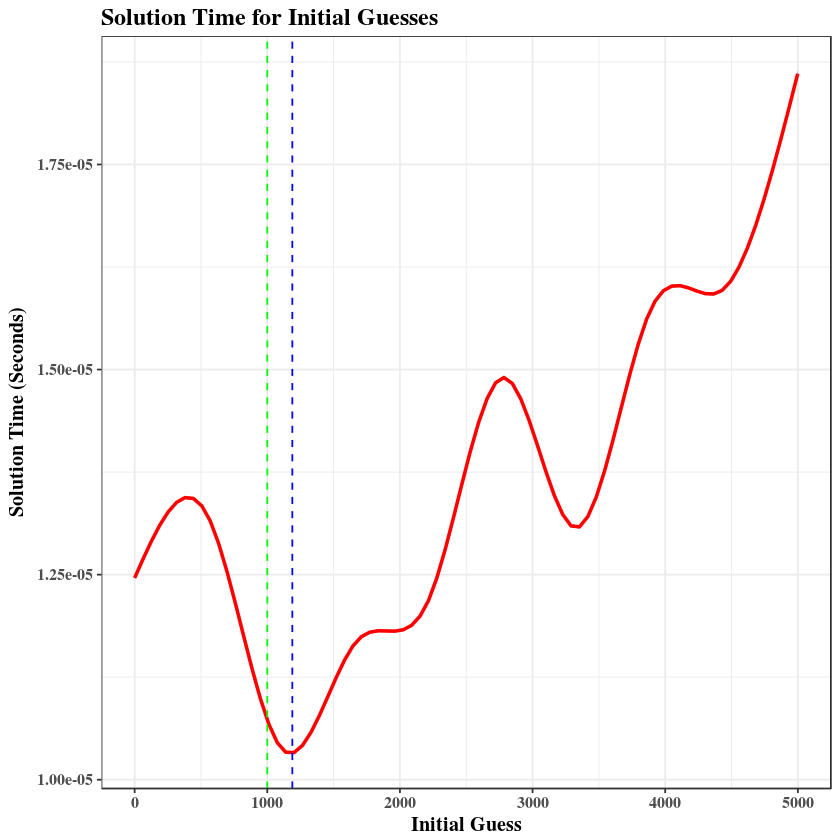

In [36]:
values <- read_csv("scenario_1_timing.csv")
ggplot(values, aes(x=q, y=time)) +
    geom_smooth(color="red") +
    geom_vline(xintercept=1000, color="green", linetype="dashed") + 
    geom_vline(xintercept=1188.844074, color="blue", linetype="dashed") +
    labs(title = "Solution Time for Initial Guesses",
         x = "Initial Guess", 
         y = "Solution Time (Seconds)"
        ) +
    theme_bw() + 
    theme(text=element_text(family="Times", face="bold", size=12))


ggsave("solution_times_report.pdf", height=4, width=6, units="in")